In [1]:
import pandas as pd
from matplotlib import pyplot

In [2]:
#upload dataset
gdata = pd.read_csv("C:/Users/Rae/Documents/Thesis/Precision_Medicine/FullCase/g_data.txt", sep = " ")

In [3]:
#Stratify dataset by sex
m_gdata = gdata[gdata.Sex == 1]
f_gdata = gdata[gdata.Sex == 0]

In [4]:
#### Build datasets according to Sex####
### male dataset ###

mNorm1 = m_gdata.RPL28
mNorm2 = 0.5*m_gdata.HNRNPF + 0.5*m_gdata.TFCP2
mNK_up = 0.5*m_gdata.SLAMF7 + 0.5*m_gdata.KLRC4
mTcell = 0.5*m_gdata.CD3D + 0.5*m_gdata.TMC8
mBcell = (2/3)*m_gdata.CD79B + (1/3)*m_gdata.SPIB
mN_up = (1/3)*m_gdata.CASP5 + (1/3)*m_gdata.IL18RAP + (1/3)*m_gdata.TNFAIP6
mN_down = 0.25*m_gdata.IL8RB + 0.25*m_gdata.TNFRSF10C + 0.25*m_gdata.TLR4 + 0.25*m_gdata.KCNE3
mSCA_1 = (1/3)*m_gdata.S100A12 + (1/3)*m_gdata.CLEC4E + (1/3)*m_gdata.S100A8
mAF2 = m_gdata.dat_assay_AF2
mTSPAN = m_gdata.TSPAN7

### female dataset ###

fNorm2 = 0.5*f_gdata.HNRNPF + 0.5*f_gdata.TFCP2
fNK_up = 0.5*f_gdata.SLAMF7 + 0.5*f_gdata.KLRC4
fTcell = 0.5*f_gdata.CD3D + 0.5*f_gdata.TMC8
fBcell = (2/3)*f_gdata.CD79B + (1/3)*f_gdata.SPIB
fN_up = (1/3)*f_gdata.CASP5 + (1/3)*f_gdata.IL18RAP + (1/3)*f_gdata.TNFAIP6
fN_down = 0.25*f_gdata.IL8RB + 0.25*f_gdata.TNFRSF10C + 0.25*f_gdata.TLR4 + 0.25*f_gdata.KCNE3
fSCA_1 = (1/3)*f_gdata.S100A12 + (1/3)*f_gdata.CLEC4E + (1/3)*f_gdata.S100A8
fAF2 = f_gdata.dat_assay_AF2
fNeut = (1/2)*f_gdata.AQP9 + (1/2)*f_gdata.NCF4


In [5]:
## Male model terms ##
mTerm1 = mN_up - mN_down
mTerm2 = mSCA_1 - mNorm1
mTerm3 = mNK_up - mTcell
mTerm4 = mBcell - mTcell
mTerm5 = mAF2 - mNorm2
mTerm6 = mTSPAN

## Female model terms ##
fTerm1 = fN_up - fN_down
fTerm2 = fSCA_1 - fNeut
fTerm3 = fNK_up - fTcell
fTerm4 = fBcell - fTcell
fTerm5 = fAF2 - fNorm2

In [6]:
#Dataset#
mGeneData = {'mTerm1':mTerm1,'mTerm2':mTerm2, 'mTerm3':mTerm3, 'mTerm4':mTerm4, 'mTerm5':mTerm5, 'mTerm6':mTerm6,'mAge':m_gdata.Age, 'mDisease': m_gdata.Disease}

In [7]:
mGeneData = pd.DataFrame(mGeneData)

In [8]:
#Female Dataset#
fGeneData = {'fTerm1':fTerm1, 'fTerm2':fTerm2, 'fTerm3':fTerm3, 'fTerm4':fTerm4, 'fTerm5':fTerm5,
             'fAge':f_gdata.Age, 'fDisease':f_gdata.Disease}
fGeneData = pd.DataFrame(fGeneData)

In [9]:
fGeneData.fAge = fGeneData.fAge - 60
for i in range(len(fGeneData.fAge)):
    if fGeneData.fAge[i] < 0:
        fGeneData.fAge[i] = 0

C:\Users\Demond Handley\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [10]:
#Import 'train_test_split' from 'sklearn.model_selection'
from sklearn.model_selection import train_test_split

#Import numpy#
import numpy as np

In [11]:
#Specify the data#
mX = mGeneData[['mTerm1','mTerm2','mTerm3','mTerm4','mTerm5','mTerm6','mAge']]
fX = fGeneData[['fTerm1','fTerm2','fTerm3','fTerm4','fTerm5','fAge']]

#Specify the Target Labels and flatten the array
my = np.ravel(mGeneData.mDisease)
fy = np.ravel(fGeneData.fDisease)

# Split the data into teain and test sets #
mX_train, mX_test, my_train, my_test = train_test_split(mX, my, test_size = 0.30, random_state = 10)
fX_train, fX_test, fy_train, fy_test = train_test_split(fX, fy, test_size = 0.30, random_state = 10)

In [12]:
#Scale the datasets#
from sklearn.preprocessing import StandardScaler

In [13]:
#Define the Scaler
mscaler = StandardScaler().fit(mX_train)
fscaler = StandardScaler().fit(fX_train)

#Scale the training set
mX_train = mscaler.transform(mX_train)
fX_train = fscaler.transform(fX_train)

#Scale the testing set
mX_test = mscaler.transform(mX_test)
fX_test = fscaler.transform(fX_test)

In [14]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, plot_roc_curve
from sklearn.model_selection import cross_val_score, cross_validate

In [ ]:
#generate no skill prediction (majority class)
mns_probs = [0 for _ in range(len(my_test))]

In [ ]:
# For Males
#merror = 0.5
#while merror > 0.3:
    mmlp = MLPClassifier(hidden_layer_sizes = (7,7,7), activation = 'tanh', solver = 'sgd', learning_rate = 'adaptive', max_iter = 5000, learning_rate_init=0.001)
    #Fit Model
    mmlp.fit(mX_train,my_train)
    # Keep Probabilities for disease outcome for men 
    my_pred = mmlp.predict_proba(mX_test)
    my_pred = my_pred[:,1]
    mcm = confusion_matrix(my_test, np.round(my_pred))
    merror = (mcm[0,1] + mcm[1,0])/np.sum(mcm)
    print(merror)

In [ ]:
#accuracies =  cross_validate(estimator=mmlp, X = mX, y = my,cv=5, scoring = 'accuracy', return_estimator = True, return_train_score = True)
#accuracies

In [ ]:
# Get Prediction for males
#my_predict = mmlp.predict(mX_test)

In [ ]:
# Keep Probabilities for disease outcome for men 
#my_pred = mmlp.predict_proba(mX_test)
#my_pred = my_pred[:,1]

In [ ]:
mcm = confusion_matrix(my_test, np.round(my_pred))
print(mcm)

In [ ]:
merror = (mcm[0,1] + mcm[1,0])/np.sum(mcm)
print(merror)

In [ ]:
#Sensitivity for males
msens = mcm[1,1]/(mcm[1,1] + mcm[0,1])
print(msens)

In [ ]:
# Specificity for males
mspec = mcm[0,0]/(mcm[0,0]+mcm[1,0])
print(mspec)

In [ ]:
# PPV for males
mppv = mcm[1,1]/(mcm[1,1]+mcm[1,0])
print(mppv)

In [ ]:
# NPV for males
mnpv = mcm[0,0]/(mcm[0,0]+mcm[0,1])
print(mnpv)

In [ ]:
#Get AUC score
mns_auc = roc_auc_score(my_test, mns_probs)
mypred_auc = np.round(roc_auc_score(my_test, my_pred),decimals = 2)
print(mns_auc)

In [ ]:
print(mns_auc)

In [ ]:
print(np.round(mypred_auc, decimals = 2))

In [ ]:
#Calculate ROC curves
mns_fpr, mns_tpr, _ = roc_curve(my_test, mns_probs)
m_pred_fpr, m_pred_tpr, _ = roc_curve(my_test, my_pred)

In [15]:
# Plot Curve for model
pyplot.plot(mns_fpr,mns_tpr, linestyle = '--', label = 'No Skill')
pyplot.plot(m_pred_fpr, m_pred_tpr, marker = '.', label = 'Males')
pyplot.text(0.7, 0.2, "AUC = " + str(mypred_auc), fontsize = 14)
#axis labels
pyplot.xlabel("False Positive Rate")
pyplot.ylabel("True Posive Rate")
#Show Legend
pyplot.legend()
#Show plot
#pyplot.show()
pyplot.savefig("MaleNNAUC.svg", format="svg")

NameError: name 'mns_fpr' is not defined

In [16]:
#generate no skill prediction (majority class)
fns_probs = [0 for _ in range(len(fy_test))]

In [17]:
# For females
fmlp = MLPClassifier(hidden_layer_sizes = (6, 6, 6, 6, 6, 6, 6), activation = 'tanh', solver = 'sgd', learning_rate = 'adaptive', max_iter = 10000, learning_rate_init=0.001)

In [18]:
# fit the model with data
ferror = 0.5
while ferror > 0.15:
    # For females
    fmlp = MLPClassifier(hidden_layer_sizes = (6, 6, 6, 6, 6, 6, 6), activation = 'tanh', solver = 'sgd', learning_rate = 'adaptive', max_iter = 10000, learning_rate_init=0.001)
    fmlp.fit(fX_train,fy_train)
    fy_pred = fmlp.predict_proba(fX_test)
    fy_pred = fy_pred[:,1]
    fcm = confusion_matrix(fy_test, np.round(fy_pred))
    ferror = (fcm[0,1] + fcm[1,0])/np.sum(fcm)
    print(ferror)

0.3333333333333333
0.6
0.6
0.26666666666666666
0.3333333333333333
0.5333333333333333
0.4
0.6
0.3333333333333333
0.6
0.3333333333333333
0.6
0.2
0.26666666666666666
0.6
0.2
0.6
0.5333333333333333
0.6
0.26666666666666666
0.26666666666666666
0.6
0.6666666666666666
0.6
0.6
0.26666666666666666
0.5333333333333333
0.6
0.26666666666666666
0.6
0.6666666666666666
0.5333333333333333
0.6
0.6
0.6
0.6
0.4
0.6
0.3333333333333333
0.3333333333333333
0.6666666666666666
0.4
0.6
0.26666666666666666
0.2
0.3333333333333333
0.6
0.6
0.6
0.4
0.6
0.6
0.6
0.26666666666666666
0.6
0.6
0.6
0.6
0.3333333333333333
0.5333333333333333
0.6
0.2
0.2
0.6
0.6
0.26666666666666666
0.6
0.2
0.6
0.6
0.6
0.6
0.4
0.3333333333333333
0.6
0.2
0.6
0.4
0.26666666666666666
0.4
0.6
0.3333333333333333
0.6
0.6666666666666666
0.6
0.5333333333333333
0.4
0.4
0.6
0.6
0.2
0.5333333333333333
0.6
0.6
0.6
0.6
0.2
0.3333333333333333
0.6
0.2
0.2
0.6
0.26666666666666666
0.6
0.6
0.5333333333333333
0.6
0.6
0.6
0.7333333333333333
0.3333333333333333
0.6
0

In [19]:
# Get Prediction for females
fy_predict=fmlp.predict(fX_test)

In [20]:
# Keep Probabilities for disease outcome for females 
fy_pred = fmlp.predict_proba(fX_test)
fy_pred = fy_pred[:,1]

In [21]:
fcm = confusion_matrix(fy_test, np.round(fy_predict))
#print(fcm)

In [22]:
ferror = (fcm[0,1] + fcm[1,0])/np.sum(fcm)
print(ferror)

0.13333333333333333


In [23]:
#Sensitivity for females
fsens = fcm[1,1]/(fcm[1,1] + fcm[0,1])
print(fsens)

1.0


In [24]:
# Specificity for females
fspec = fcm[0,0]/(fcm[0,0]+fcm[1,0])
print(fspec)

0.75


In [25]:
# PPV for females
fppv = fcm[1,1]/(fcm[1,1]+fcm[1,0])
print(fppv)

0.7777777777777778


In [26]:
# NPV for females
fnpv = fcm[0,0]/(fcm[0,0]+fcm[0,1])
print(fnpv)

1.0


In [27]:
#Get AUC score
fns_auc = roc_auc_score(fy_test, fns_probs)
fypred_auc = np.round(roc_auc_score(fy_test, fy_pred),decimals = 2)
print(fns_auc)

0.5


In [28]:
print(fns_auc)

0.5


In [29]:
print(np.round(fypred_auc, decimals = 2))

0.83


In [30]:
#Calculate ROC curves
fns_fpr, fns_tpr, _ = roc_curve(fy_test, fns_probs)
f_pred_fpr, f_pred_tpr, _ = roc_curve(fy_test, fy_pred)

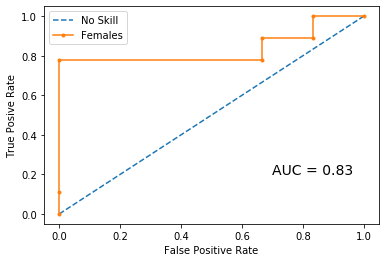

In [31]:
# Plot Curve for model
pyplot.plot(fns_fpr,fns_tpr, linestyle = '--', label = 'No Skill')
pyplot.plot(f_pred_fpr, f_pred_tpr, marker = '.', label = 'Females')
pyplot.text(0.7, 0.2, "AUC = " + str(fypred_auc), fontsize = 14)
#axis labels
pyplot.xlabel("False Positive Rate")
pyplot.ylabel("True Posive Rate")
#Show Legend
pyplot.legend()
#Show plot
#pyplot.show()
#pyplot.savefig("FemaleNNAUC.svg", format="svg")